In [1]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.preprocessing import image
import os

Using TensorFlow backend.


In [2]:
os.chdir('C:\\Users\\shaik shoyab\\Desktop\\Data_Science\\Datasets')

In [3]:
classifier = Sequential()

W0203 19:35:29.239825 15324 deprecation_wrapper.py:119] From C:\Users\shaik shoyab\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [4]:
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

C:\Users\shaik shoyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.
W0203 19:35:29.574664 15324 deprecation_wrapper.py:119] From C:\Users\shaik shoyab\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0203 19:35:29.590290 15324 deprecation_wrapper.py:119] From C:\Users\shaik shoyab\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0203 19:35:29.642572 15324 deprecation_wrapper.py:119] From C:\Users\shaik shoyab\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [5]:
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

C:\Users\shaik shoyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  """Entry point for launching an IPython kernel.


In [6]:
classifier.add(Flatten())

In [7]:
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid'))

C:\Users\shaik shoyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\shaik shoyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


In [8]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [9]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


W0203 19:35:30.350759 15324 deprecation_wrapper.py:119] From C:\Users\shaik shoyab\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0203 19:35:30.401706 15324 deprecation_wrapper.py:119] From C:\Users\shaik shoyab\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0203 19:35:30.413698 15324 deprecation.py:323] From C:\Users\shaik shoyab\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [11]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory('test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [13]:
classifier.fit_generator(training_set,
                         samples_per_epoch = 50,#samples_per_epoch = 8000,
                         nb_epoch = 10, # nb_epoch = 25,
                         validation_data = test_set,
                         nb_val_samples = 20)#nb_val_samples = 2000)

C:\Users\shaik shoyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """
C:\Users\shaik shoyab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=<keras_pre..., steps_per_epoch=1, epochs=10, validation_steps=20)`
  """
W0203 19:35:32.245524 15324 deprecation_wrapper.py:119] From C:\Users\shaik shoyab\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
1/1 [==============================] - 4s 4s/step - loss: 0.7154 - acc: 0.3125 - val_loss: 0.9030 - val_acc: 0.4938
Epoch 2/10
1/1 [==============================] - 3s 3s/step - loss: 0.9076 - acc: 0.4688 - val_loss: 0.6992 - val_acc: 0.5469
Epoch 3/10
1/1 [==============================] - 3s 3s/step - loss: 0.7324 - acc: 0.5000 - val_loss: 0.6921 - val_acc: 0.5281
Epoch 4/10
1/1 [==============================] - 3s 3s/step - loss: 0.6876 - acc: 0.6250 - val_loss: 0.6974 - val_acc: 0.5256
Epoch 5/10
1/1 [==============================] - 3s 3s/step - loss: 0.7292 - acc: 0.4062 - val_loss: 0.7089 - val_acc: 0.4859
Epoch 6/10
1/1 [==============================] - 3s 3s/step - loss: 0.7367 - acc: 0.3750 - val_loss: 0.6988 - val_acc: 0.5156
Epoch 7/10
1/1 [==============================] - 3s 3s/step - loss: 0.6745 - acc: 0.6250 - val_loss: 0.6993 - val_acc: 0.4920
Epoch 8/10
1/1 [==============================] - 3s 3s/step - loss: 0.6946 - acc: 0.5312 - val_loss: 0.7037 - 

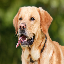

In [14]:
test_image = image.load_img('single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image

In [15]:
test_image = image.img_to_array(test_image)
test_image

array([[[ 54.,  58.,   7.],
        [ 58.,  63.,   9.],
        [ 64.,  67.,  10.],
        ...,
        [136., 144.,  71.],
        [140., 150.,  77.],
        [139., 149.,  78.]],

       [[ 48.,  54.,   6.],
        [ 51.,  58.,   7.],
        [ 58.,  63.,   9.],
        ...,
        [129., 137.,  64.],
        [139., 149.,  78.],
        [141., 151.,  80.]],

       [[ 48.,  56.,   7.],
        [ 48.,  56.,   7.],
        [ 54.,  61.,  10.],
        ...,
        [123., 130.,  63.],
        [136., 145.,  80.],
        [140., 149.,  82.]],

       ...,

       [[ 46.,  55.,  12.],
        [ 42.,  50.,   9.],
        [ 38.,  49.,   9.],
        ...,
        [239., 205., 170.],
        [235., 209., 186.],
        [229., 202., 173.]],

       [[ 50.,  57.,  15.],
        [ 42.,  50.,   9.],
        [ 44.,  52.,  11.],
        ...,
        [234., 200., 162.],
        [236., 206., 178.],
        [234., 203., 174.]],

       [[ 53.,  59.,  13.],
        [ 43.,  51.,  10.],
        [ 49.,  

In [16]:
test_image = np.expand_dims(test_image, axis = 0)
test_image

array([[[[ 54.,  58.,   7.],
         [ 58.,  63.,   9.],
         [ 64.,  67.,  10.],
         ...,
         [136., 144.,  71.],
         [140., 150.,  77.],
         [139., 149.,  78.]],

        [[ 48.,  54.,   6.],
         [ 51.,  58.,   7.],
         [ 58.,  63.,   9.],
         ...,
         [129., 137.,  64.],
         [139., 149.,  78.],
         [141., 151.,  80.]],

        [[ 48.,  56.,   7.],
         [ 48.,  56.,   7.],
         [ 54.,  61.,  10.],
         ...,
         [123., 130.,  63.],
         [136., 145.,  80.],
         [140., 149.,  82.]],

        ...,

        [[ 46.,  55.,  12.],
         [ 42.,  50.,   9.],
         [ 38.,  49.,   9.],
         ...,
         [239., 205., 170.],
         [235., 209., 186.],
         [229., 202., 173.]],

        [[ 50.,  57.,  15.],
         [ 42.,  50.,   9.],
         [ 44.,  52.,  11.],
         ...,
         [234., 200., 162.],
         [236., 206., 178.],
         [234., 203., 174.]],

        [[ 53.,  59.,  13.],
       

In [17]:
x=preprocess_input(test_image)
x

array([[[[-96.939    , -58.779    , -69.68     ],
         [-94.939    , -53.779    , -65.68     ],
         [-93.939    , -49.779    , -59.68     ],
         ...,
         [-32.939003 ,  27.221    ,  12.32     ],
         [-26.939003 ,  33.221    ,  16.32     ],
         [-25.939003 ,  32.221    ,  15.32     ]],

        [[-97.939    , -62.779    , -75.68     ],
         [-96.939    , -58.779    , -72.68     ],
         [-94.939    , -53.779    , -65.68     ],
         ...,
         [-39.939003 ,  20.221    ,   5.3199997],
         [-25.939003 ,  32.221    ,  15.32     ],
         [-23.939003 ,  34.221    ,  17.32     ]],

        [[-96.939    , -60.779    , -75.68     ],
         [-96.939    , -60.779    , -75.68     ],
         [-93.939    , -55.779    , -69.68     ],
         ...,
         [-40.939003 ,  13.221001 ,  -0.6800003],
         [-23.939003 ,  28.221    ,  12.32     ],
         [-21.939003 ,  32.221    ,  16.32     ]],

        ...,

        [[-91.939    , -61.779    , -7

In [18]:
result = classifier.predict(x)

In [19]:
result

array([[0.]], dtype=float32)

In [20]:
print(training_set.class_indices)


{'cats': 0, 'dogs': 1}


In [21]:

if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [22]:
prediction

'cat'

In [23]:
test_image = image.load_img('single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [24]:
y=preprocess_input(test_image)

In [25]:
result = classifier.predict(y)
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)


cat
